In [5]:
from keras.models import load_model
import numpy as np
import pickle
import os
import pypianoroll


In [7]:
input_path = '..\data'
model = load_model(os.path.join(input_path, '03_model', 'lstm', 'checkpoints', 'best_model.h5'))
preparation_path = os.path.join(input_path, '02_preparation')
validation_path = os.path.join(input_path, '04_validation', 'lstm')
no_of_timesteps = 32

In [8]:
file = os.path.join(preparation_path, f'x_val.pkl')
with open(file, 'rb') as f:
    x_val = pickle.load(f).astype(np.float32)

In [93]:

def predict(x_val, seq_size, track_number):
    track_predictions = []

    for j in range(track_number):
        ind = np.random.randint(0,len(x_val)-1)
        random_music = x_val[ind]

        predictions=[]
        for i in range(seq_size):

            random_music = random_music.reshape(-1, 1,no_of_timesteps)

            prob  = model.predict(random_music)[0]
            y_pred= np.argmax(prob,axis=0)
            predictions.append(y_pred)

            random_music = np.insert(random_music[0], 0 ,y_pred)
            random_music = random_music[:-1]
        track_predictions.append(predictions)

    return track_predictions

def transform_notes(track_predictions):
    predicted_notes_track = []
    for track in track_predictions:
        predicted_notes = []
        for p in track:
            note = np.zeros(128)
            if p < 129:
                note[p] = 127
            predicted_notes.append(note)

        predicted_notes = np.array(predicted_notes)
        predicted_notes_track.append(predicted_notes)

    predicted_notes_track = np.array(predicted_notes_track)
    return predicted_notes_track

def predict_transform(x_val, seq_size, track_number):
    track_predictions = predict(x_val, seq_size, track_number)
    return transform_notes(track_predictions)

def create_piano_song(x_val):
    seq_size = 500
    track_number = 2
    predictions = predict_transform(x_val, seq_size, track_number)
    piano_track_right = pypianoroll.StandardTrack(name = 'Piano Right', program = 0, is_drum = False, pianoroll = predictions[0, :, :])
    piano_track_left = pypianoroll.StandardTrack(name = 'Piano Left', program = 0, is_drum = False, pianoroll = predictions[1, :, :])

    generated_multitrack = pypianoroll.Multitrack(name = 'Generated', resolution = 4, tracks = [
                                                                                              piano_track_right,
                                                                                              piano_track_left,
                                                                                              ])
    generated_multitrack.plot()
    return generated_multitrack

def create_string_quartet(x_val):
    seq_size = 500
    track_number = 4
    predictions = predict_transform(x_val, seq_size, track_number)
    violin1_track = pypianoroll.StandardTrack(name = 'Violin1', program = 41, is_drum = False, pianoroll = predictions[0, :, :])
    violin2_track = pypianoroll.StandardTrack(name = 'Violin2', program = 41, is_drum = False, pianoroll = predictions[1, :, :])
    viola_track = pypianoroll.StandardTrack(name = 'Viola', program = 42, is_drum = False, pianoroll = predictions[2, :, :])
    cello_track = pypianoroll.StandardTrack(name = 'Cello', program = 43, is_drum = False, pianoroll = predictions[3, :, :])

    generated_multitrack = pypianoroll.Multitrack(name = 'Generated', resolution = 4, tracks = [
                                                                                              violin1_track,
                                                                                              violin2_track,
                                                                                              viola_track,
                                                                                              cello_track,
                                                                                              ])
    generated_multitrack.plot()
    return generated_multitrack

def create_piano_quartet(x_val):
    seq_size = 500
    track_number = 5
    predictions = predict_transform(x_val, seq_size, track_number)

    piano_track_right = pypianoroll.StandardTrack(name = 'Piano Right', program = 0, is_drum = False, pianoroll = predictions[0, :, :])
    piano_track_left = pypianoroll.StandardTrack(name = 'Piano Left', program = 0, is_drum = False, pianoroll = predictions[1, :, :])
    violin1_track = pypianoroll.StandardTrack(name = 'Violin1', program = 41, is_drum = False, pianoroll = predictions[2, :, :])
    viola_track = pypianoroll.StandardTrack(name = 'Viola', program = 42, is_drum = False, pianoroll = predictions[3, :, :])
    cello_track = pypianoroll.StandardTrack(name = 'Cello', program = 43, is_drum = False, pianoroll = predictions[4, :, :])

    generated_multitrack = pypianoroll.Multitrack(name = 'Generated', resolution = 4, tracks = [
                                                                                              piano_track_right,
                                                                                              piano_track_left,
                                                                                              violin1_track,
                                                                                              viola_track,
                                                                                              cello_track,
                                                                                              ])
    generated_multitrack.plot()
    return generated_multitrack

def create_accompanied_cello(x_val):
    seq_size = 500
    track_number = 3
    predictions = predict_transform(x_val, seq_size, track_number)

    piano_track_right = pypianoroll.StandardTrack(name = 'Piano Right', program = 0, is_drum = False, pianoroll = predictions[0, :, :])
    piano_track_left = pypianoroll.StandardTrack(name = 'Piano Left', program = 0, is_drum = False, pianoroll = predictions[1, :, :])
    cello_track = pypianoroll.StandardTrack(name = 'Cello', program = 43, is_drum = False, pianoroll = predictions[2, :, :])

    generated_multitrack = pypianoroll.Multitrack(name = 'Generated', resolution = 4, tracks = [
                                                                                              piano_track_right,
                                                                                              piano_track_left,
                                                                                              cello_track,
                                                                                              ])
    generated_multitrack.plot()
    return generated_multitrack

def create_accompanied_violin(x_val):
    seq_size = 500
    track_number = 3
    predictions = predict_transform(x_val, seq_size, track_number)
    piano_track_right = pypianoroll.StandardTrack(name = 'Piano Right', program = 0, is_drum = False, pianoroll = predictions[0, :, :])
    piano_track_left = pypianoroll.StandardTrack(name = 'Piano Left', program = 0, is_drum = False, pianoroll = predictions[1, :, :])
    violin1_track = pypianoroll.StandardTrack(name = 'Violin1', program = 41, is_drum = False, pianoroll = predictions[2, :, :])


    generated_multitrack = pypianoroll.Multitrack(name = 'Generated', resolution = 4, tracks = [
                                                                                              piano_track_right,
                                                                                              piano_track_left,
                                                                                              violin1_track,
                                                                                              ])
    generated_multitrack.plot()
    return generated_multitrack


1/1 [==============================] - 0s 17ms/step


Multitrack(name='Generated', resolution=4, tracks=[StandardTrack(name='Piano Right', program=0, is_drum=False, pianoroll=array(shape=(150, 128), dtype=uint8)), StandardTrack(name='Piano Left', program=0, is_drum=False, pianoroll=array(shape=(150, 128), dtype=uint8)), StandardTrack(name='Violin1', program=41, is_drum=False, pianoroll=array(shape=(150, 128), dtype=uint8))])

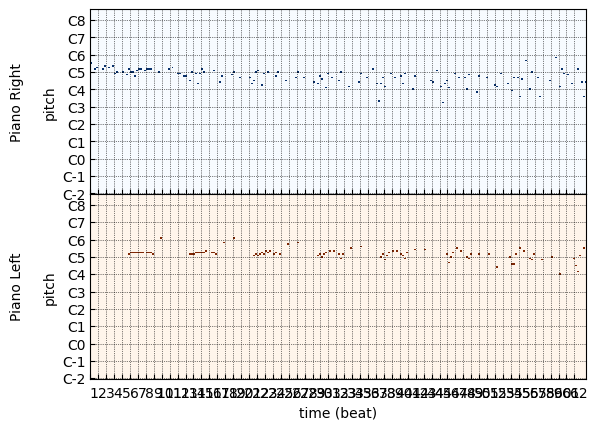

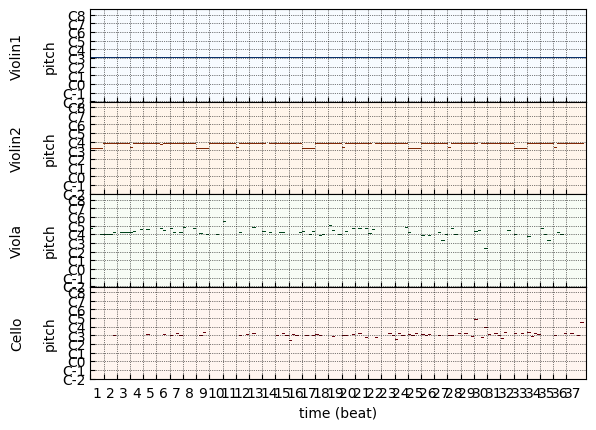

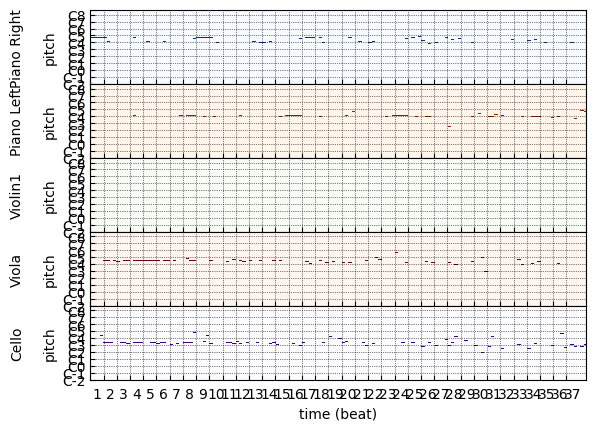

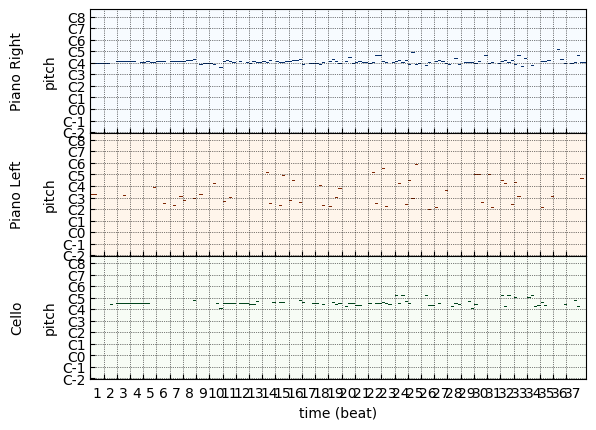

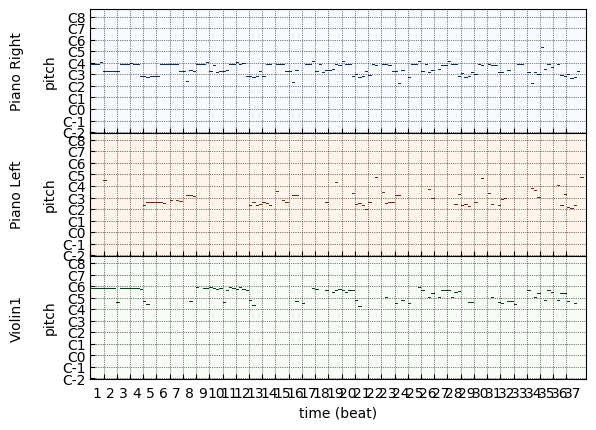

In [94]:
piano_track = create_piano_song(x_val)
string_quartet_track = create_string_quartet(x_val)
piano_quartet_track = create_piano_quartet(x_val)
accompanied_cello_track = create_accompanied_cello(x_val)
accompanied_violin_track = create_accompanied_violin(x_val)


In [ ]:

pypianoroll.write(os.path.join(validation_path, 'piano_track_0.mid'), piano_track)
pypianoroll.write(os.path.join(validation_path, 'string_quartet_track_0.mid'), string_quartet_track)
pypianoroll.write(os.path.join(validation_path, 'piano_quartet_track_0.mid'), piano_quartet_track)
pypianoroll.write(os.path.join(validation_path, 'accompanied_cello_track_0.mid'), accompanied_cello_track)
pypianoroll.write(os.path.join(validation_path, 'accompanied_violin_track_0.mid'), accompanied_violin_track)
